# V243 Thermisches Rauschen

## Auswertung der Messergebnisse

In [24]:
#Benötigte Pakete
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams['errorbar.capsize']=3

### Teil 3: Messung des Frequenzgangs des Verstärkers und des Bandfilters

In [25]:
#Importieren der Messdaten
freq, U_aus=np.loadtxt('243 Text.txt', skiprows=1, usecols=(0,1), unpack=True)

#Abschwächung des Dämpfungsglieds
D=1e-3

#Eingangsspannung
U_ein=0.2
#Frequenzgang g(freq)
g=U_aus/(U_ein*D)

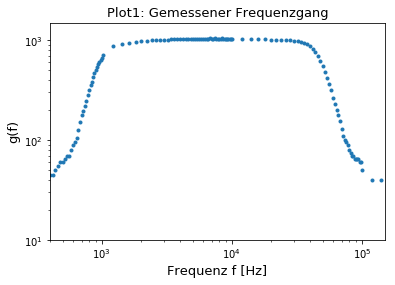

In [26]:
#Plot der Messdaten
plt.loglog(freq,g,linestyle='None', marker='.')
plt.axis([4E2,1.5e5,10,1.5E3])
plt.xlabel(r'Frequenz f [Hz]',size=13)
plt.ylabel(r'g(f)',size=13)
plt.title('Plot1: Gemessener Frequenzgang',size=13)


#Abspeichern des Bildes im Format "PDF"
plt.savefig('Diag_1.png', dpi = 500)

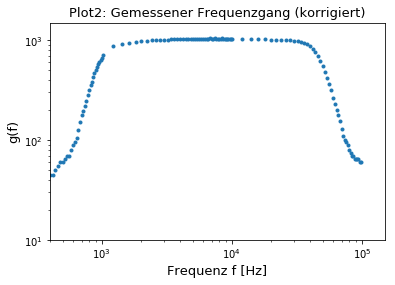

In [27]:
#Plot der Messdaten ohne störende Randwerte

plt.loglog(freq[15:-45],g[15:-45],linestyle='None', marker='.')
plt.axis([4E2,1.5e5,10,1.5E3])
plt.xlabel(r'Frequenz f [Hz]',size=13)
plt.ylabel(r'g(f)',size=13)
plt.title('Plot2: Gemessener Frequenzgang (korrigiert)',size=13)

plt.savefig('Diag_2.png', dpi = 500)

In [28]:
#Funktion anpassen
def fit_function(freq,V,W1,W2,n1,n2):
    return V/(np.sqrt(1+1/(freq/W1)**(2*n1))*np.sqrt(1+(freq/W2)**(2*n2)))

#Startwerte:
#Verstärkung V=1000, untere Grenzfrequenz W1= 1000, obere Grenzfrequenz W2= 50000

p0= [1000, 1000, 50000, 5, 5]

popt1,pcov1= curve_fit(fit_function, freq[15:-45],g[15:-45], p0)

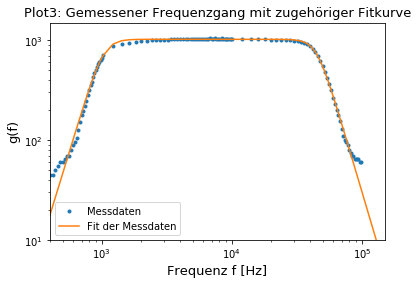

In [29]:
#Plot der Messdaten inklusive Fit 

plt.loglog(freq[15:-45],g[15:-45],linestyle='None', marker='.', label='Messdaten')
plt.loglog(freq,fit_function(freq,*popt1), label='Fit der Messdaten')
plt.axis([4E2,1.5e5,10,1.5E3])
plt.xlabel(r'Frequenz f [Hz]',size=13)
plt.ylabel(r'g(f)',size=13)
plt.title('Plot3: Gemessener Frequenzgang mit zugehöriger Fitkurve',size=13)
plt.legend(loc='best')

plt.savefig('Diag_3.png', dpi = 500)

#### Numerische Integration

In [30]:
def fit_function_squared(freq,V,W1,W2,n1,n2):
    return fit_function(freq,V,W1,W2,n1,n2)**2

B=integrate.quad(fit_function_squared, freq[15], freq[-45], args=tuple(popt1))
print('Das Integral beträgt: {value:.4e}'.format(value=B[0]))

Das Integral beträgt: 4.6763e+10


### Teil 2: Bestimmung der Boltzmannkonstante

In [31]:
#Widerstand und gemessene Rauschspannung

R=np.array([5e3, 10e3, 15e3, 20e3, 25e3, 30e3])

U_aus=np.array([2.4018,3.0996,3.6698,4.1681,4.6223,5.0393])*1e-3

U_aus_err_stdabm=np.array([8.07/np.sqrt(104),9/np.sqrt(103),14.5/np.sqrt(104),
                    17.5/np.sqrt(102),16.5/np.sqrt(103),17.8/np.sqrt(104)])*1e-6
#Fehler des Voltmeters
U_aus_err_voltmeter=0.003*U_aus
U_aus_err=np.sqrt(U_aus_err_voltmeter**2+U_aus_err_stdabm**2)

U_V=1.3714e-3 #Nullmessung
#Standardabweichung des Mittelwerts
U_V_err_stdabm=5.77/np.sqrt(103)*1e-6+0.003*U_V
#Fehler des Voltmeters 
U_V_err_voltmeter=0.003*U_V
U_V_err=np.sqrt(U_V_err_voltmeter**2+U_V_err_stdabm**2)

diff_U=U_aus**2-U_V**2
diff_U_err=np.sqrt((2*U_aus*U_aus_err)**2+(2*U_V*U_V_err)**2)

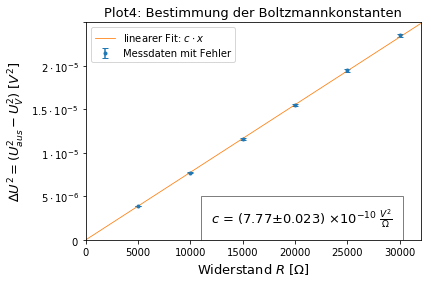

In [32]:
#linearer Fit
def linear(x,c):
    return c*x

popt2,pcov2= curve_fit(linear,R,diff_U,sigma=diff_U_err, absolute_sigma=True)

#Plot der Messdaten mit linearem Fit
x0=np.linspace(0,32000,1000)
plt.errorbar(R,diff_U, yerr=diff_U_err, fmt='.', label='Messdaten mit Fehler')
plt.plot(x0,linear(x0,*popt2), linewidth=0.8, label=r'linearer Fit: $c\cdot x$')
plt.axis([0,3.2e4,0,2.5e-5])
plt.xlabel(r'Widerstand $R$ [$\Omega$]',size=13)
plt.ylabel(r'$∆U^2=(U_{aus}^2-U_V^2)$ [$V^2$]',size=13)
plt.title('Plot4: Bestimmung der Boltzmannkonstanten',size=13)
plt.yticks([0,5e-6,1e-5,1.5e-5,2e-5,2.5e-5],[r'$0$',r'$5 \cdot 10^{-6}$',r'$1 \cdot 10^{-5}$',r'$1.5 \cdot 10^{-5}$',r'$2 \cdot 10^{-5}$'])
plt.text(12000,2e-6, "$c$ = ("+str(round(popt2[0]*1e10,3))+"$\pm$"+str(round(pcov2[0,0]**0.5*1e10,3))+")" + ' ' r"$\times 10^{-10}$" + ' ' + r"$\frac{V^2}{\Omega}$",bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=13)
plt.legend(loc='best')

plt.savefig('Diag_4.png', dpi = 500)

In [33]:
#Güte des Fits
chi_squared=np.sum(((linear(R,*popt2)-diff_U)**2/diff_U_err**2))

#Freiheitsgrade
dof=len(R)-1

chi_squared_red=chi_squared/dof

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared))
print('chi_squared_red= ' + str(chi_squared_red))

#Fitwahrscheinlichkeit
prob=round(1-chi2.cdf(chi_squared,dof),2)*100

print('Die Fitwahrscheinlichkeit beträgt: {} %'.format(prob))

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 3.3468355824072544
chi_squared_red= 0.6693671164814509
Die Fitwahrscheinlichkeit beträgt: 65.0 %


In [34]:
#Theorie: c=4kTB

T=298.75
T_err=0.05

B_err=B[0]*0.02

k=popt2[0]/(4*B[0]*T)
k_stat=k*np.sqrt((np.sqrt(pcov2[0,0])/popt2[0])**2+(T_err/T)**2)
k_syst=k*0.02

print('Aus unseren Messwerten folgt für die Boltzmannkonstante:')
print('k = ' + str(k) + ' +/- ' + str(k_stat) + ' +/- ' + str(k_syst))

Aus unseren Messwerten folgt für die Boltzmannkonstante:
k = 1.390484485469739e-23 +/- 4.151850595768292e-26 +/- 2.7809689709394782e-25
